# EAI6000 Assignment 6 - Basic NLP with NLTK

Using ebook text from The Project Gutenberg: Songs of Innocence and Experience by William Blake

In [356]:
#initial download of gutenberg corpora through NLTK
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\janie\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [357]:
#import gutenberg corpora through NLTK
from nltk.corpus import gutenberg

In [358]:
#review files
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [359]:
data = []
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    # get total vocabulary used in this book
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) 
    data.append([
        fileid.split('.')[0] # remove .txt from file name
        ,round(num_chars/num_words)    
        ,round(num_words/num_sents)
        # total vocabulary used divide total words used
        ,round(num_vocab/num_words,2) 
    ])
pattern_metrics = pd.DataFrame(data,columns=['author-book','chars_per_word','words_per_sentence','vocabulary_rate'])
pattern_metrics

,author-book,chars_per_word,words_per_sentence,vocabulary_rate
0,austen-emma,5,25,0.04
1,austen-persuasion,5,26,0.06
2,austen-sense,5,28,0.05
3,bible-kjv,4,34,0.01
4,blake-poems,5,19,0.18
5,bryant-stories,4,19,0.07
6,burgess-busterbrown,4,18,0.08
7,carroll-alice,4,20,0.08
8,chesterton-ball,5,20,0.09
9,chesterton-brown,5,23,0.09


In [360]:
for text in gutenberg.fileids():
    words = gutenberg.words(text)

In [361]:
targets = ['song', 'love', 'child']
filtered = []
for text in gutenberg.fileids():
    words = gutenberg.words(text)
    for word in words:
        word_lc = word.lower()              # word.lower() converts the word to lower case
        if word_lc in targets:
            filtered.append((word_lc, text))

In [362]:
print(filtered[:20])

[('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('child', 'austen-emma.txt'), ('child', 'austen-emma.txt'), ('child', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('child', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt'), ('love', 'austen-emma.txt')]


In [363]:
data = nltk.ConditionalFreqDist(filtered)
print(data)

<ConditionalFreqDist with 3 conditions>


In [364]:
data['song']

FreqDist({'whitman-leaves.txt': 106, 'bible-kjv.txt': 48, 'bryant-stories.txt': 21, 'milton-paradise.txt': 21, 'edgeworth-parents.txt': 15, 'blake-poems.txt': 10, 'melville-moby_dick.txt': 8, 'carroll-alice.txt': 7, 'chesterton-ball.txt': 6, 'austen-emma.txt': 5, ...})

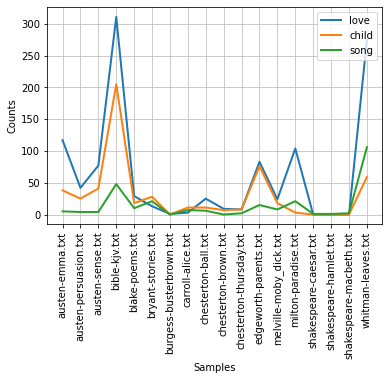

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [365]:
data.plot()

In [366]:
# check number of words in blake-poems
len(gutenberg.raw('blake-poems.txt'))

38153

In [367]:
# check number of sentences
totalsents = len(gutenberg.sents('blake-poems.txt'))
print(totalsents)

438


In [368]:
#view first 1000 words of blake text
print(gutenberg.raw('blake-poems.txt').strip()[:1000])

[Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS OF INNOCENCE
 
 
 INTRODUCTION
 
 Piping down the valleys wild,
   Piping songs of pleasant glee,
 On a cloud I saw a child,
   And he laughing said to me:
 
 "Pipe a song about a Lamb!"
   So I piped with merry cheer.
 "Piper, pipe that song again;"
   So I piped: he wept to hear.
 
 "Drop thy pipe, thy happy pipe;
   Sing thy songs of happy cheer:!"
 So I sang the same again,
   While he wept with joy to hear.
 
 "Piper, sit thee down and write
   In a book, that all may read."
 So he vanish'd from my sight;
   And I pluck'd a hollow reed,
 
 And I made a rural pen,
   And I stain'd the water clear,
 And I wrote my happy songs
   Every child may joy to hear.
 
 
 THE SHEPHERD
 
 How sweet is the Shepherd's sweet lot!
 From the morn to the evening he stays;
 He shall follow his sheep all the day,
 And his tongue shall be filled with praise.
 
 For he hears the lambs' innocent call,
 And

In [369]:
# View line by number.
for i, line in enumerate(gutenberg.raw('blake-poems.txt').split('\n')):
    if i > 150: # Lets take a look at the first 100 lines.
        break
    print(str(i) + ':\t' + line)

0:	[Poems by William Blake 1789]
1:	
2:	 
3:	SONGS OF INNOCENCE AND OF EXPERIENCE
4:	and THE BOOK of THEL
5:	
6:	
7:	 SONGS OF INNOCENCE
8:	 
9:	 
10:	 INTRODUCTION
11:	 
12:	 Piping down the valleys wild,
13:	   Piping songs of pleasant glee,
14:	 On a cloud I saw a child,
15:	   And he laughing said to me:
16:	 
17:	 "Pipe a song about a Lamb!"
18:	   So I piped with merry cheer.
19:	 "Piper, pipe that song again;"
20:	   So I piped: he wept to hear.
21:	 
22:	 "Drop thy pipe, thy happy pipe;
23:	   Sing thy songs of happy cheer:!"
24:	 So I sang the same again,
25:	   While he wept with joy to hear.
26:	 
27:	 "Piper, sit thee down and write
28:	   In a book, that all may read."
29:	 So he vanish'd from my sight;
30:	   And I pluck'd a hollow reed,
31:	 
32:	 And I made a rural pen,
33:	   And I stain'd the water clear,
34:	 And I wrote my happy songs
35:	   Every child may joy to hear.
36:	 
37:	 
38:	 THE SHEPHERD
39:	 
40:	 How sweet is the Shepherd's sweet lot!
41:	 From the mor

In [370]:
gutenberg.raw('blake-poems.txt').split('\n')[1233] ##Songs of Innocence 10:534; Songs of Experience 540:1233

' And wish to lead others, when they should be led.'

### Two Lists: SONGS OF INNOCENCE & SONGS OF EXPERIENCE

In [371]:
innocence = gutenberg.raw('blake-poems.txt').split('\n')[10:535]
experience = gutenberg.raw('blake-poems.txt').split('\n')[540:1234]

In [372]:
textinn = list(innocence)

In [373]:
textexp = list(experience)

In [374]:
tokens = word_tokenize(gutenberg.raw('blake-poems.txt'))

In [375]:
type(tokens)

list

In [376]:
len(tokens)

8239

In [377]:
tokens[8229:9239]

['back',
 'unhinderd',
 'till',
 'she',
 'came',
 'into',
 'the',
 'vales',
 'of',
 'Har']

In [378]:
text = nltk.Text(tokens)
type(text)

nltk.text.Text

In [379]:
cleantxt = text[30050:30060]

In [380]:
text.collocations()

Little Lamb; human form; DIVINE IMAGE; LITTLE GIRL; form divine; fade
away; LITTLE BOY; HOLY THURSDAY; Lillys leaf; echoing Green; fearful
symmetry; desert wild; tell thee; little ones; Dost thou; human dress;
watery shore; Gave thee; given thee; William Blake


In [381]:
for i, line in enumerate(innocence):
    if i > 150: # look at the first 150 lines of innocence.
        break
    print(str(i) + ':\t' + line)

0:	 INTRODUCTION
1:	 
2:	 Piping down the valleys wild,
3:	   Piping songs of pleasant glee,
4:	 On a cloud I saw a child,
5:	   And he laughing said to me:
6:	 
7:	 "Pipe a song about a Lamb!"
8:	   So I piped with merry cheer.
9:	 "Piper, pipe that song again;"
10:	   So I piped: he wept to hear.
11:	 
12:	 "Drop thy pipe, thy happy pipe;
13:	   Sing thy songs of happy cheer:!"
14:	 So I sang the same again,
15:	   While he wept with joy to hear.
16:	 
17:	 "Piper, sit thee down and write
18:	   In a book, that all may read."
19:	 So he vanish'd from my sight;
20:	   And I pluck'd a hollow reed,
21:	 
22:	 And I made a rural pen,
23:	   And I stain'd the water clear,
24:	 And I wrote my happy songs
25:	   Every child may joy to hear.
26:	 
27:	 
28:	 THE SHEPHERD
29:	 
30:	 How sweet is the Shepherd's sweet lot!
31:	 From the morn to the evening he stays;
32:	 He shall follow his sheep all the day,
33:	 And his tongue shall be filled with praise.
34:	 
35:	 For he hears the lambs' in

In [382]:
for i, line in enumerate(experience):
    if i > 150: # look at the first 150 lines of experience.
        break
    print(str(i) + ':\t' + line)

0:	 INTRODUCTION
1:	 
2:	 Hear the voice of the Bard,
3:	 Who present, past, and future, sees;
4:	 Whose ears have heard
5:	 The Holy Word
6:	 That walked among the ancient tree;
7:	 
8:	 Calling the lapsed soul,
9:	 And weeping in the evening dew;
10:	 That might control
11:	 The starry pole,
12:	 And fallen, fallen light renew!
13:	 
14:	 "O Earth, O Earth, return!
15:	 Arise from out the dewy grass!
16:	 Night is worn,
17:	 And the morn
18:	 Rises from the slumbrous mass.
19:	 
20:	 "Turn away no more;
21:	 Why wilt thou turn away?
22:	 The starry floor,
23:	 The watery shore,
24:	 Are given thee till the break of day."
25:	 
26:	 
27:	 EARTH'S ANSWER
28:	 
29:	 Earth raised up her head
30:	 From the darkness dread and drear,
31:	 Her light fled,
32:	 Stony, dread,
33:	 And her locks covered with grey despair.
34:	 
35:	 "Prisoned on watery shore,
36:	 Starry jealousy does keep my den
37:	 Cold and hoar;
38:	 Weeping o're,
39:	 I hear the father of the ancient men.
40:	 
41:	 "Selfi

In [383]:
len(innocence)

525

In [384]:
len(experience)

694

In [385]:
print(innocence[524]) #check for last line

 He doth sit by us and moan.


In [386]:
import pandas as pd

df = pd.DataFrame({'songs': ['innocence', 'experience'], 'text' : [textinn, textexp]})

In [387]:
df.dropna()

,songs,text
0,innocence,"[ INTRODUCTION, , Piping down the valleys wi..."
1,experience,"[ INTRODUCTION, , Hear the voice of the Bard..."


In [388]:
df['text']

0    [ INTRODUCTION,  ,  Piping down the valleys wi...
1    [ INTRODUCTION,  ,  Hear the voice of the Bard...
Name: text, dtype: object

In [389]:
#import tokenize
from nltk import sent_tokenize, word_tokenize
from typing import List

In [390]:
text_dict = {'Innocence':innocence, "Experience": experience}

for key in text_dict.keys():
    print(key, ':', len(text_dict[key]), ' sentences')

Innocence : 525  sentences
Experience : 694  sentences


In [391]:
i = 1
nl = []

while i < 25:
    for sent in sent_tokenize(innocence[i]):
        print(word_tokenize(sent))
    nl.append(word_tokenize(sent))
    i += 1

['Piping', 'down', 'the', 'valleys', 'wild', ',']
['Piping', 'songs', 'of', 'pleasant', 'glee', ',']
['On', 'a', 'cloud', 'I', 'saw', 'a', 'child', ',']
['And', 'he', 'laughing', 'said', 'to', 'me', ':']
['``', 'Pipe', 'a', 'song', 'about', 'a', 'Lamb', '!', "''"]
['So', 'I', 'piped', 'with', 'merry', 'cheer', '.']
['``', 'Piper', ',', 'pipe', 'that', 'song', 'again', ';', "''"]
['So', 'I', 'piped', ':', 'he', 'wept', 'to', 'hear', '.']
['``', 'Drop', 'thy', 'pipe', ',', 'thy', 'happy', 'pipe', ';']
['Sing', 'thy', 'songs', 'of', 'happy', 'cheer', ':', '!', "''"]
['So', 'I', 'sang', 'the', 'same', 'again', ',']
['While', 'he', 'wept', 'with', 'joy', 'to', 'hear', '.']
['``', 'Piper', ',', 'sit', 'thee', 'down', 'and', 'write']
['In', 'a', 'book', ',', 'that', 'all', 'may', 'read', '.', "''"]
['So', 'he', 'vanish', "'d", 'from', 'my', 'sight', ';']
['And', 'I', 'pluck', "'d", 'a', 'hollow', 'reed', ',']
['And', 'I', 'made', 'a', 'rural', 'pen', ',']
['And', 'I', 'stain', "'d", 'the', 'w

### Remove Stopwords

In [392]:
#import stopwords
from nltk.corpus import stopwords

In [393]:
# Treat the multiple sentences as one document (no need to sent_tokenize)
# Tokenize and lowercase
sent96_tokenized_lowered = list(map(str.lower, word_tokenize(innocence[96])))
print(sent96_tokenized_lowered)

['i', 'a', 'child', ',', 'and', 'thou', 'a', 'lamb', ',']


In [394]:
stopwords_en = stopwords.words('english') #store stopwords

In [395]:
# view words outside of stopwords list
print([word for word in sent96_tokenized_lowered if word not in stopwords_en])

['child', ',', 'thou', 'lamb', ',']


In [396]:
from string import punctuation
stopwords_en.extend(set(punctuation)) #add punctuation to stopwords list

In [397]:
print([word for word in sent96_tokenized_lowered if word not in stopwords_en]) #view without punctuation and stopwords

['child', 'thou', 'lamb']


In [398]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [399]:
wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]


In [400]:
lemmatize_sent(innocence[96])

['i', 'a', 'child', ',', 'and', 'thou', 'a', 'lamb', ',']

In [401]:
print('Original Sentence 96:')
print(sent96, '\n')
print('Lemmatized and removed stopwords:')
print([word for word in lemmatize_sent(sent96) 
       if word not in stopwords_en
       and not word.isdigit() ])

Original Sentence 96:
 I a child, and thou a lamb, 

Lemmatized and removed stopwords:
['child', 'thou', 'lamb']


In [402]:
# create function for process of lemmatization and POS
def preprocess_text(text):
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    return [word for word in lemmatize_sent(text) 
            if word not in stopwords_en
            and not word.isdigit()]

### Vectorize

In [403]:
sent92 = innocence[92]

In [405]:
with StringIO('\n'.join([innocence[96],innocence[92]])) as fin:
    # Override the analyzer totally with our preprocess text
    count_vect = CountVectorizer(analyzer=preprocess_text)
    count_vect.fit_transform(fin)
count_vect.vocabulary_ 

{'child': 1, 'thou': 4, 'lamb': 2, 'call': 0, 'thy': 5, 'name': 3}

### Analysis

In [406]:
import pandas as pd
from io import StringIO

blake = gutenberg.raw('blake-poems.txt')


In [407]:
bp = pd.DataFrame(textinn)

In [408]:
bp.head()

,0
0,INTRODUCTION
1,
2,"Piping down the valleys wild,"
3,"Piping songs of pleasant glee,"
4,"On a cloud I saw a child,"


In [409]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 

train, valid = train_test_split(bp, test_size=0.2) #train test split

In [410]:
count_vect = CountVectorizer(analyzer=preprocess_text)